In [33]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally
fix_pythonpath_if_working_locally()

from darts.models import TCNModel
from darts.utils import timeseries_generation as tg

In [60]:
def stack_ts_list(ts_list):
    combined_ts = ts_list[0]
    for ts in ts_list[1:]:
        combined_ts = combined_ts.stack(ts)
    return combined_ts

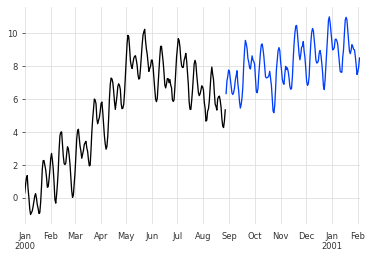

In [61]:
ts_length = 400
split_ratio = 0.6
sine_1_ts = tg.sine_timeseries(length=ts_length)
sine_2_ts = tg.sine_timeseries(length=ts_length, value_frequency=0.05)
linear_ts = tg.linear_timeseries(length=ts_length, end_value=5)
random_ts = tg.random_walk_timeseries(length=ts_length, std=0.2)

covariates = [sine_1_ts, linear_ts, random_ts]
covariates_past, covariates_future = zip(*[cov.split_after(split_ratio) for cov in covariates])
covariates_past, covariates_future = stack_ts_list(covariates_past), stack_ts_list(covariates_future)

target = sine_1_ts + sine_2_ts + linear_ts + random_ts
target_past, target_future = target.split_after(split_ratio)

target_past.plot()
target_future.plot()

### No covariates, consuming output

In [72]:
model_tcn = TCNModel(
    input_chunk_length=100,
    output_chunk_length=20,
    n_epochs=100, 
    dropout=0, 
    dilation_base=2, 
    weight_norm=True,
    kernel_size=3,
    num_filters=2,
    nr_epochs_val_period=1,
    random_state=0
)

In [73]:
model_tcn.fit(series=target_past)

[2021-06-03 15:26:01,608] INFO | darts.models.torch_forecasting_model | Train dataset contains 121 samples.
[2021-06-03 15:26:01,608] INFO | darts.models.torch_forecasting_model | Train dataset contains 121 samples.
[2021-06-03 15:26:01,614] INFO | darts.models.tcn_model | Number of layers chosen: 5
[2021-06-03 15:26:01,614] INFO | darts.models.tcn_model | Number of layers chosen: 5


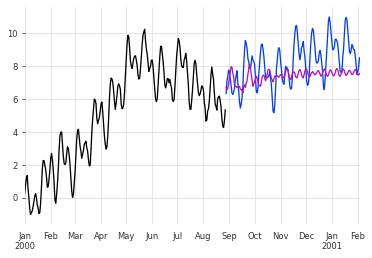

In [77]:
pred = model_tcn.predict(160)
target_past.plot()
target_future.plot()
pred.plot()

### Including future covariates, consuming output